# <center><span style="background-color:#b22234"><font color=white>Anoop Mettu - Project 3 </span></font></center>
### <center><span style="background-color:#3c3b6e"><font color=white>Data Set: AllLife Bank from USA </font></span></center>

- __Name:__ Anoop Mettu
- __Date:__ August 2021
- __Project:__ Python - Supervised Learning (Classification)
- __Easter egg:__ Using USA's red & blue color scheme for the entire book)

## <font color=white><span style="background-color:#b22234">Project</span><span style="background-color:#3c3b6e"> Introduction </span></font> 
This is the Third project in the AIML course curriculum. It is intended to help with understanding and building __Decision Tree prediction models.__ 


#### Dataset intro: 
The dataset holds details about the California customers of a US bank named 'All Life'. The specific details include:
- Customer's Age
- Number of Years of Professional Experience
- Annual Income (in Thousand USD)
- US Zip Code
- Number of family members
- Average monthly spending on Credit Card (in Thousand USD)
- Level of education (Undergrad, grad, advanced)
- House mortgage value
- Action on previous Personal Loan offer (__The target variable__)
- Existense of Securities Account with All Life bank
- Existense of Certificate of Deposit (CD) Account with All Life bank
- Online banking usage
- Credit Cards with other banks 

#### Project Goal:
Our goal for this project is:
- To understand if there are any significant differences in customers who took an action on the previous personal loan marketing offer and if they accepted the offer. 
- Through testing of regression models and classificaiton decision trees, we shall try to predict if a given customer will respond to a personal loan campaign in the future.
- Once we understand which type of customers will accept the offer, target our future marketing campaigns to similar customers for a better turn out


# <center><font color=white><span style="background-color:#b22234">Python</span><span style="background-color:#3c3b6e"> Code </span></font></center>

## <font color=white><span style="background-color:#b22234">Required</span><span style="background-color:#3c3b6e"> Packages </span></font>

#### Here are the packages needed for this project

<ol>
    <li>Numpy: For numerical operations</li>
    <li>Pandas: For creating & manipulating dataframes</li>
    <li>Matplotlib: For basic data vizualisations</li>
    <li>Seaborn: For improving the visualizations</li>
    <li>Warnings: To ensure smooth flow of plotting commands without warning interuptions</li>
    <li>Linear Regression: For running regreesion models</li>
    <li>Train Test Split: For splitting the dataset into training and testing groups and comparing model efficiency</li>
    <li>SK Learn Metrics: To test and understand the model performance and plot confusion matrix</li>
        
</ol>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

from uszipcode import SearchEngine

In [2]:
%matplotlib inline
#To automatically display output of plotting commands  

warnings.filterwarnings('ignore')

plt.style.use('ggplot')
# To improve the visuals of the plots using ggplot styles.

## <font color=white><span style="background-color:#b22234"> Data Loading </span><span style="background-color:#3c3b6e"> & Preprocessing </span></font>

In [3]:
df = pd.read_csv("Loan_Modelling.csv") #Loading the dataset and creating a python data frame

df_backup = df.copy() #Creating a copy to have original dataset accesible in case of any mistakes.

In [4]:
df.head() #Eexamining the data & columns

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### Random rows

- Picking __25 random rows__ of the data and checking entries to understand the data from each columns

In [5]:
np.random.seed(1)
df.sample(25)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2764,2765,31,5,84,91320,1,2.90,3,105,0,0,0,0,1
4767,4768,35,9,45,90639,3,0.90,1,101,0,1,0,0,0
3814,3815,34,9,35,94304,3,1.30,1,0,0,0,0,0,0
3499,3500,49,23,114,94550,1,0.30,1,286,0,0,0,1,0
2735,2736,36,12,70,92131,3,2.60,2,165,0,0,0,1,0
3922,3923,31,4,20,95616,4,1.50,2,0,0,0,0,1,0
2701,2702,50,26,55,94305,1,1.60,2,0,0,0,0,1,0
1179,1180,36,11,98,90291,3,1.20,3,0,0,1,0,0,1
932,933,51,27,112,94720,3,1.80,2,0,0,1,1,1,1
792,793,41,16,98,93117,1,4.00,3,0,0,0,0,0,1


#### Dropping ID Column
- Since the ID column is just an index column, we can safely drop it

In [6]:
df.drop('ID', axis=1, inplace=True)
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### 'info()' function

Understand multiple aspects of each of the columns, including
- Number of non-null values
- data types
- number of rows & columns. 

We can see that all the columns are essentially of numeric type. However columns like - Zipcode, education, personal loan, securities account, CD account, online, credit card are actually categorical variables

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [8]:
category_columns = ['Education','Personal_Loan','Securities_Account','CD_Account','Online','CreditCard']

#### Null values

It appears from the info command that the dataset is free of null values. Let us confirm that with the 'isnull()' function

In [9]:
df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

## <font color=white><span style="background-color:#b22234"> Data </span><span style="background-color:#3c3b6e"> Visualization </span></font>

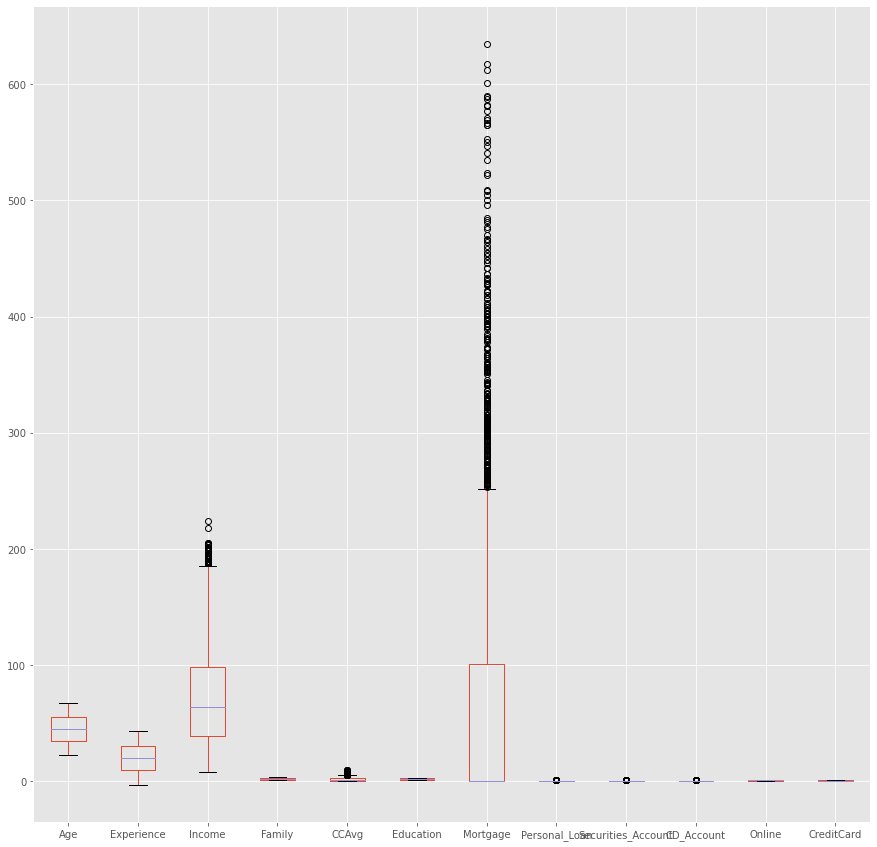

In [10]:
df.drop('ZIPCode', axis=1).boxplot(figsize=(15,15));

#### Outliers:
- __Mortage__ column seems to have a considerable number of outliers. However, this is majorly due to the fact that nearly 90% of the users do not have a mortage

In [11]:
df.Mortgage.value_counts()

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

#### Histograms:
- Understanding the distrubtion of data in all columns

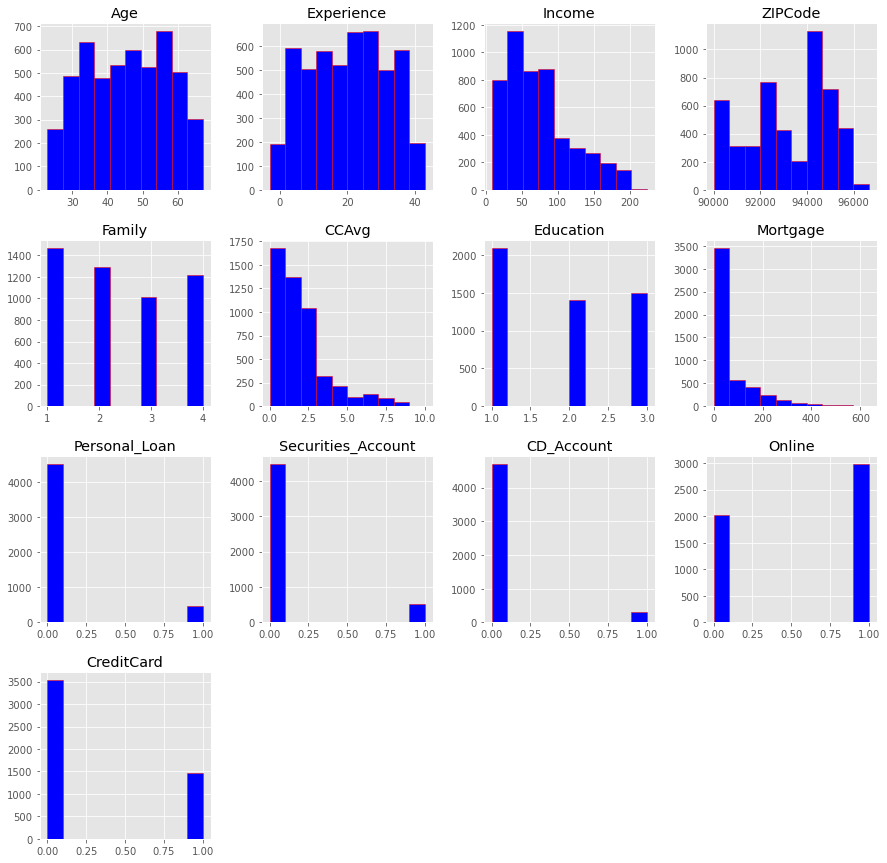

In [12]:
df.hist(figsize=(15,15), facecolor='blue', edgecolor='red');

#### Correlation:
- Understanding the corelations between each of the columns

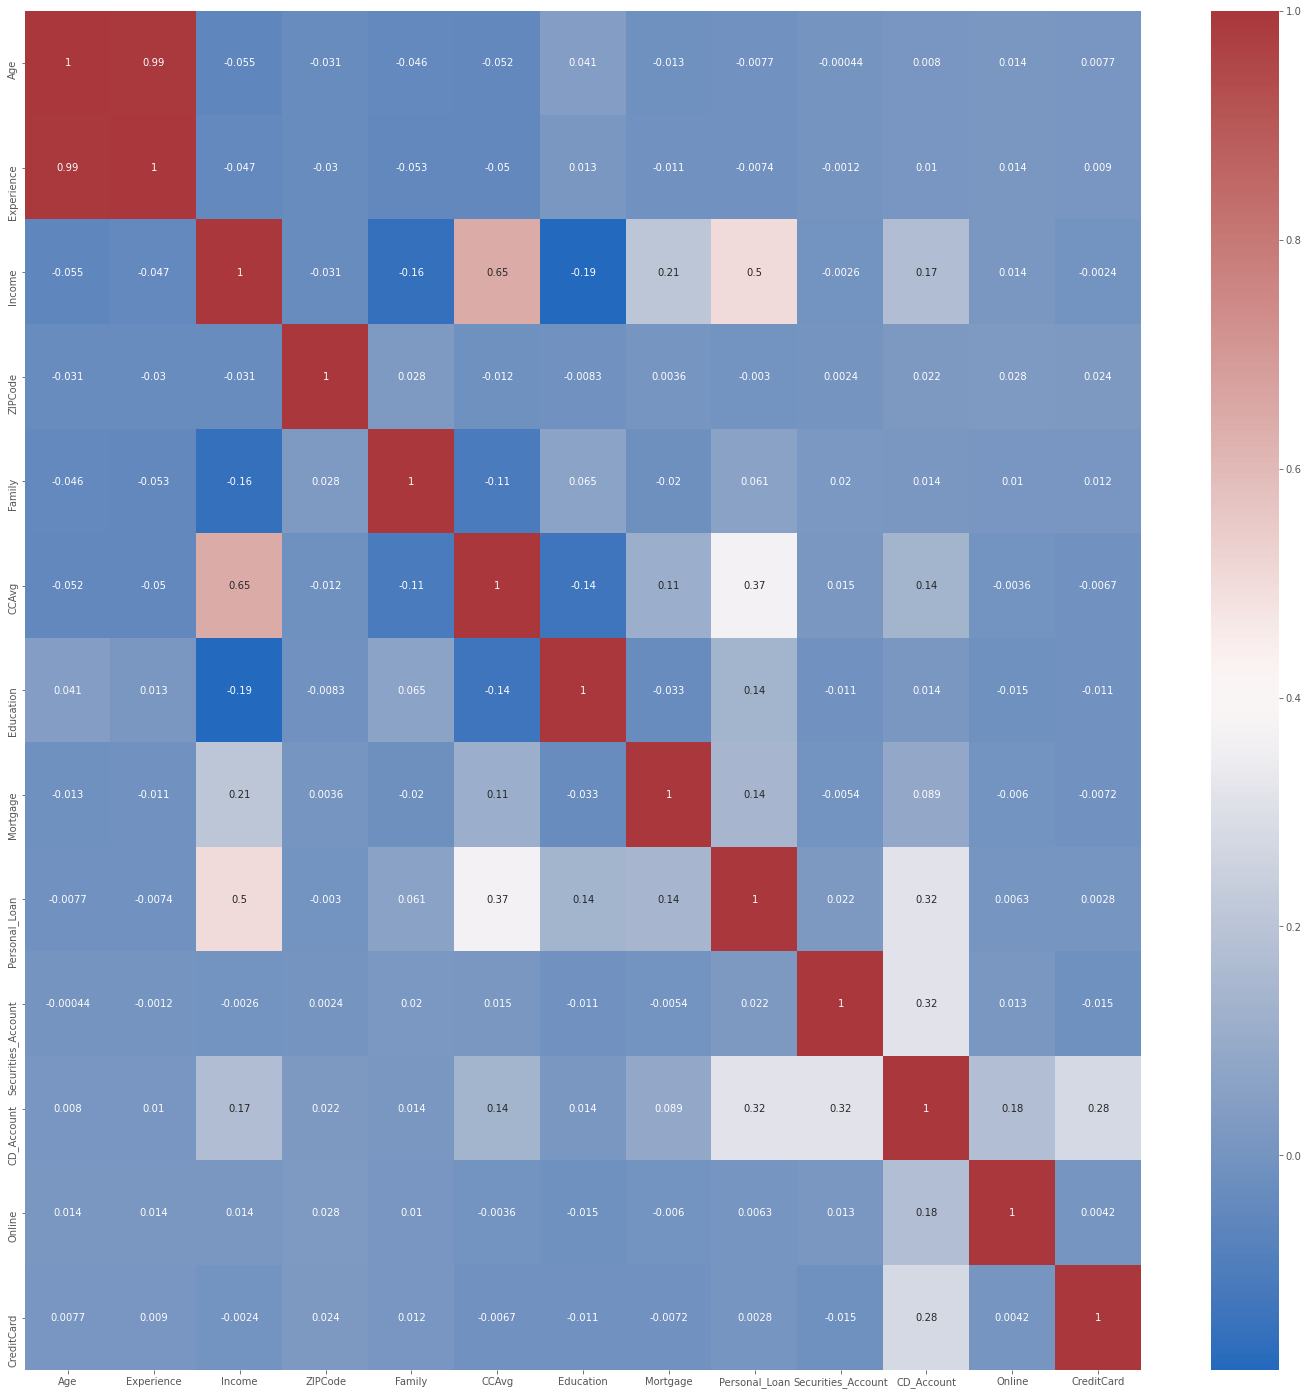

In [13]:
plt.subplots(figsize=(25,25))
sns.heatmap(df.corr(), annot=True, cmap='vlag');

We can see that the columns with the highest correlation of 0.65 are Credit card average monthly spending (CCAvg) and Income. However, 0.65 is not strong enough for us to drop the columns. The only other column with significant correlation (0.5) is Income & Personal Loan. But since personal loan is our target variable, we cannot drop that either.

#### Categorical columns:
- Understanding the number of unique values and their counts in each of the categorical caloumns. 
- It appears that all of the categorical columns except Education are binary, with education having 3 levels

In [14]:
for i in category_columns:
    print(f"Value counts in {i} column: \n",df[i].value_counts(dropna=False),"\n \n")

Value counts in Education column: 
 1    2096
3    1501
2    1403
Name: Education, dtype: int64 
 

Value counts in Personal_Loan column: 
 0    4520
1     480
Name: Personal_Loan, dtype: int64 
 

Value counts in Securities_Account column: 
 0    4478
1     522
Name: Securities_Account, dtype: int64 
 

Value counts in CD_Account column: 
 0    4698
1     302
Name: CD_Account, dtype: int64 
 

Value counts in Online column: 
 1    2984
0    2016
Name: Online, dtype: int64 
 

Value counts in CreditCard column: 
 0    3530
1    1470
Name: CreditCard, dtype: int64 
 



## <font color=white><span style="background-color:#b22234"> Tackling </span><span style="background-color:#3c3b6e"> Zipcodes </span></font>

- Checking the number of unique zipcodes in the dataset

In [15]:
df['ZIPCode'].value_counts().loc[lambda x: x>0]

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
94970      1
92694      1
94404      1
94598      1
94965      1
Name: ZIPCode, Length: 467, dtype: int64

#### US Zipcode Package
- Using US Zipcode package to search & retrive location details based on zipcode.

In [16]:
search = SearchEngine()
df['location'] = df['ZIPCode'].apply(search.by_zipcode)

#### Zipcode to County
- Creating a function to extract county from zipcode data

In [17]:
def zip2county(i):
    return i.county

In [18]:
df['county']=df.location.apply(zip2county)

#### County bucketing:
- Simplifying the number of counties based on the most frequent counties list

In [19]:
freq_county=df.county.value_counts()[df.county.value_counts().values>100]
freq_county.index.tolist()

['Los Angeles County',
 'San Diego County',
 'Santa Clara County',
 'Alameda County',
 'Orange County',
 'San Francisco County',
 'San Mateo County',
 'Sacramento County',
 'Santa Barbara County',
 'Yolo County',
 'Monterey County',
 'Ventura County',
 'San Bernardino County']

In [20]:
def county_simplify(i):
    if i in freq_county:
        return i
    else: return 'Other'

In [21]:
df['county']=df.county.apply(county_simplify)

In [22]:
df.county.value_counts()

Los Angeles County       1095
Other                     663
San Diego County          568
Santa Clara County        563
Alameda County            500
Orange County             339
San Francisco County      257
San Mateo County          204
Sacramento County         184
Santa Barbara County      154
Yolo County               130
Monterey County           128
Ventura County            114
San Bernardino County     101
Name: county, dtype: int64

Since we have the county and don't plan on using the actual zipcode and the full location data, we can safely drop those columns

In [23]:
df.drop(['ZIPCode','location'], axis=1, inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal_Loan       5000 non-null   int64  
 8   Securities_Account  5000 non-null   int64  
 9   CD_Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
 12  county              5000 non-null   object 
dtypes: float64(1), int64(11), object(1)
memory usage: 507.9+ KB


In [25]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,county
0,25,1,49,4,1.6,1,0,0,1,0,0,0,Los Angeles County
1,45,19,34,3,1.5,1,0,0,1,0,0,0,Los Angeles County
2,39,15,11,1,1.0,1,0,0,0,0,0,0,Alameda County
3,35,9,100,1,2.7,2,0,0,0,0,0,0,San Francisco County
4,35,8,45,4,1.0,2,0,0,0,0,0,1,Los Angeles County


## <font color=white><span style="background-color:#b22234"> Dummy </span><span style="background-color:#3c3b6e"> Variables </span></font>

- let's create dummy variables for the county column

In [26]:
df = pd.get_dummies(df, columns=['county'])

In [27]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,...,county_Other,county_Sacramento County,county_San Bernardino County,county_San Diego County,county_San Francisco County,county_San Mateo County,county_Santa Barbara County,county_Santa Clara County,county_Ventura County,county_Yolo County
0,25,1,49,4,1.6,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## <font color=white><span style="background-color:#b22234"> Model </span><span style="background-color:#3c3b6e"> Building </span></font>

#### Creating dependent ( y ) & independent ( x ) variables 

In [28]:
x=df.drop('Personal_Loan', axis=1)
y=df[['Personal_Loan']]

#### Creating training & testing datasets

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)

#### Initiating the regression model

In [30]:
reg_mod = LinearRegression()

#### Fitting the model with training data

In [31]:
reg_mod.fit(x_train, y_train)

LinearRegression()

#### Checking the model performance with training data

Here we can see that the model predicts personal loan customers with 39% accuracy. This is not very high to begin with. Let us see how the model performs on test data

In [32]:
reg_mod.score(x_train, y_train)

0.39435556015160245

Our model has even lower accuracy on the testing data with only ~37% success rate. This clearly show that linear regression might not be the best model for our current data

In [33]:
reg_mod.score(x_test,y_test)

0.3695927379422861

#### Coefficients
- Checking which co-efficients play the most important role

In [34]:
reg_mod.intercept_.flatten()

array([-0.2073699])

In [35]:
reg_mod.coef_.flatten() #list of coefficients

array([-6.19734208e-03,  6.44197936e-03,  2.81068688e-03,  3.33117037e-02,
        1.67172530e-02,  7.53104822e-02,  8.76355182e-05, -7.24477947e-02,
        3.28865603e-01, -2.57678322e-02, -4.64942300e-02, -7.06744761e-04,
       -2.35571258e-03,  1.63895102e-02, -1.65626482e-02,  2.49528638e-02,
        2.34736600e-02, -4.23320544e-02,  1.25054968e-02,  3.07216975e-03,
       -2.34108346e-02,  1.97809918e-02,  7.20892669e-03,  4.77573725e-03,
       -2.67913617e-02])

In [36]:
coef_list = np.append(reg_mod.intercept_.flatten(),reg_mod.coef_.flatten()) #Adding intercept value to the list
coef_list 

array([-2.07369896e-01, -6.19734208e-03,  6.44197936e-03,  2.81068688e-03,
        3.33117037e-02,  1.67172530e-02,  7.53104822e-02,  8.76355182e-05,
       -7.24477947e-02,  3.28865603e-01, -2.57678322e-02, -4.64942300e-02,
       -7.06744761e-04, -2.35571258e-03,  1.63895102e-02, -1.65626482e-02,
        2.49528638e-02,  2.34736600e-02, -4.23320544e-02,  1.25054968e-02,
        3.07216975e-03, -2.34108346e-02,  1.97809918e-02,  7.20892669e-03,
        4.77573725e-03, -2.67913617e-02])

#### Visualizing the coefficients

In [37]:
indx_list=['Intercept']+x_train.columns.tolist()

In [38]:
coeff_df = pd.DataFrame(coef_list, index=indx_list, columns=['Coefficients'])

In [39]:
coeff_df.sort_values(by='Coefficients', ascending=False)

,Coefficients
CD_Account,0.328866
Education,0.075310
Family,0.033312
county_Other,0.024953
county_Sacramento County,0.023474
county_Santa Barbara County,0.019781
CCAvg,0.016717
county_Monterey County,0.016390
county_San Diego County,0.012505
county_Santa Clara County,0.007209


Here we can see that having a certificate of deposit (CD) account with the bank is the most important factor in our model

## <font color=white><span style="background-color:#b22234"> Regression </span><span style="background-color:#3c3b6e"> Performance </span></font>

In [40]:
# Adjusted R^2
def adjusted_R_squared(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Model performance check
def model_performance_metrics(model, inp, out):

    y_pred = np.exp(model.predict(inp))
    y_act = np.exp(out)

    return pd.DataFrame(
        {
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "MAE": mean_absolute_error(y_act, y_pred),
            "R Squred": r2_score(y_act, y_pred),
            "Adjusted R Squared": adjusted_R_squared(inp, y_act, y_pred),
        },
        index=[0],
    )

In [41]:
#Training set performance
print("\n Training dataset Performance:")
model_performance_metrics(reg_mod, x_train, y_train)


 Training dataset Performance:


,RMSE,MAE,R Squred,Adjusted R Squared
0,0.391574,0.217215,0.393507,0.389142


In [42]:
#Testing set pefor,ance
print("\n Testing dataset Performance:")
model_performance_metrics(reg_mod, x_test, y_test)


 Testing dataset Performance:


,RMSE,MAE,R Squred,Adjusted R Squared
0,0.412808,0.227501,0.354867,0.343926


So far comparing both training and testing metrics, RMSE seems to show the highest success scores. However, even that is far less than desirable and only about ~40%

# <font color=white><span style="background-color:#b22234"> Decision </span><span style="background-color:#3c3b6e"> Trees </span></font>

In [43]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [44]:
print("Training accuracy : ",dTree.score(x_train, y_train))
print("Test set accuracy : ",dTree.score(x_test, y_test))

Training accuracy :  1.0
Test set accuracy :  0.9753333333333334


- The Tree seems to be performing well on both training and testing data sets. However, there is definite overfitting owing to the fact that the model explains 100% of the variation in the training set

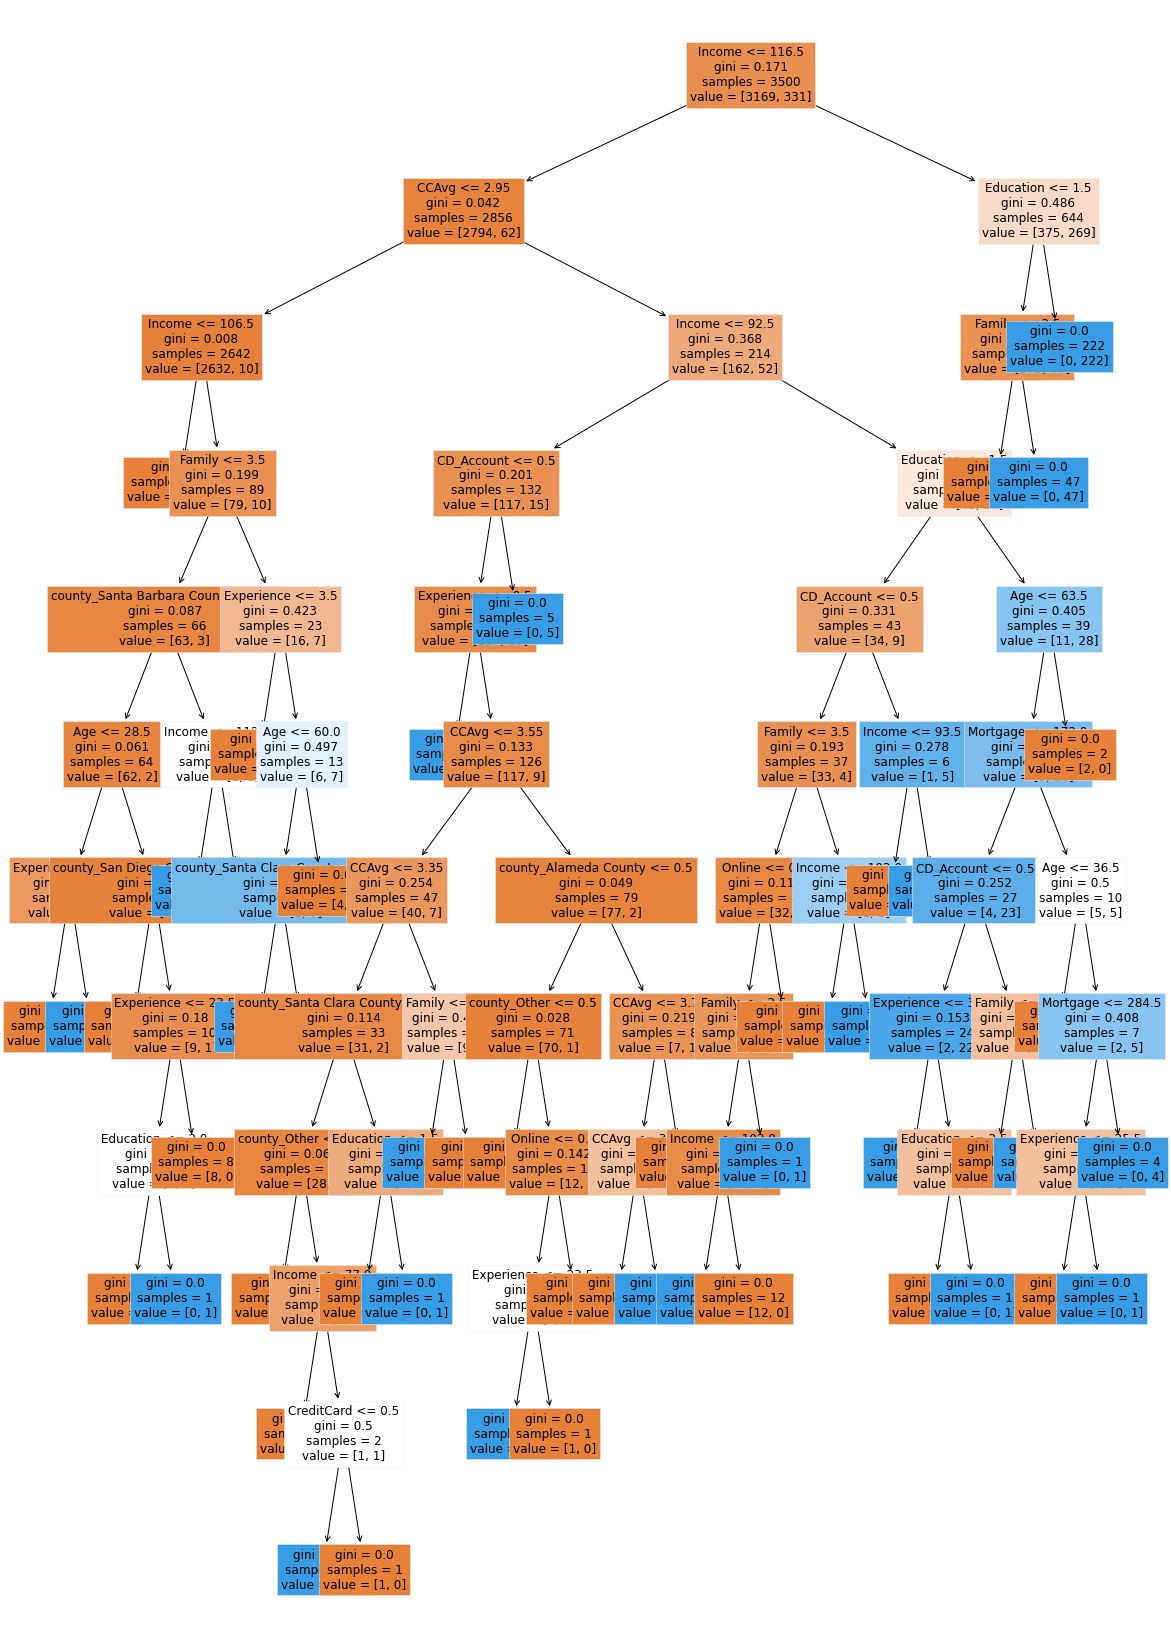

In [45]:
train_col = list(x.columns)

plt.figure(figsize=(20,30))

out = tree.plot_tree(dTree, feature_names=train_col, filled=True, fontsize=12)

#Adding arrows
for i in out:
     arrow = i.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)

plt.show()

In [46]:
print (pd.DataFrame(dTree.feature_importances_, columns = ["Importance"], index = x_train.columns).sort_values(by = 'Importance', ascending = False))

                              Importance
Education                       0.407347
Income                          0.308570
Family                          0.162162
CCAvg                           0.045103
CD_Account                      0.025711
Experience                      0.020223
Age                             0.013196
county_Santa Clara County       0.005735
Mortgage                        0.005557
Online                          0.001972
CreditCard                      0.001668
county_Santa Barbara County     0.001422
county_Other                    0.000762
county_Alameda County           0.000295
county_San Diego County         0.000276
county_Ventura County           0.000000
county_San Mateo County         0.000000
county_San Francisco County     0.000000
county_Los Angeles County       0.000000
county_San Bernardino County    0.000000
county_Sacramento County        0.000000
county_Orange County            0.000000
county_Monterey County          0.000000
Securities_Accou

# <font color=white><span style="background-color:#b22234"> Decision Tree </span><span style="background-color:#3c3b6e"> Prepruning </span></font>

### The tree is very long & complex and demonstrated overfitting. Let's use pre-pruning to combat overfitting

In [47]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
dTree1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [48]:
# Accuracy on train and test
print("Training set accuracy : ",dTree1.score(x_train, y_train))
print("Test set accuracy : ",dTree1.score(x_test, y_test))

Training set accuracy :  0.9822857142857143
Test set accuracy :  0.9753333333333334


# <font color=white><span style="background-color:#b22234"> Confusion </span><span style="background-color:#3c3b6e"> Matrix </span></font>

### Now let's check the confusion matrix and see how our model performs

In [49]:
confusion_matrix(y_test, dTree1.predict(x_test), labels=[0,1])

array([[1351,    0],
       [  37,  112]], dtype=int64)

Here we can see that the __True negatives__ are 1351 and __True Positives__ are 112. The model is very precise as there are no __False positives__ at all, meaning our model has perfect __selectivity and precision__. But there are 37 __False Negatives__. Since the goal of the bank is to maximize loans, a lost opportunity(False negative) is more costly than a False positive. Hence, we should try to optimize the model for better 'Recall'

# <font color=white><span style="background-color:#b22234"> Tree </span><span style="background-color:#3c3b6e"> Visualization </span></font>

In [50]:
print (pd.DataFrame(dTree1.feature_importances_, columns = ["Importance"], index = x_train.columns).sort_values(by = 'Importance', ascending = False))

                              Importance
Education                       0.446593
Income                          0.346997
Family                          0.162372
CCAvg                           0.044038
Age                             0.000000
county_Other                    0.000000
county_Ventura County           0.000000
county_Santa Clara County       0.000000
county_Santa Barbara County     0.000000
county_San Mateo County         0.000000
county_San Francisco County     0.000000
county_San Diego County         0.000000
county_San Bernardino County    0.000000
county_Sacramento County        0.000000
county_Los Angeles County       0.000000
county_Orange County            0.000000
county_Monterey County          0.000000
Experience                      0.000000
county_Alameda County           0.000000
CreditCard                      0.000000
Online                          0.000000
CD_Account                      0.000000
Securities_Account              0.000000
Mortgage        

Here we can see that the importance is still the same with Education, Income anf Family(members) being the Top 3 factors

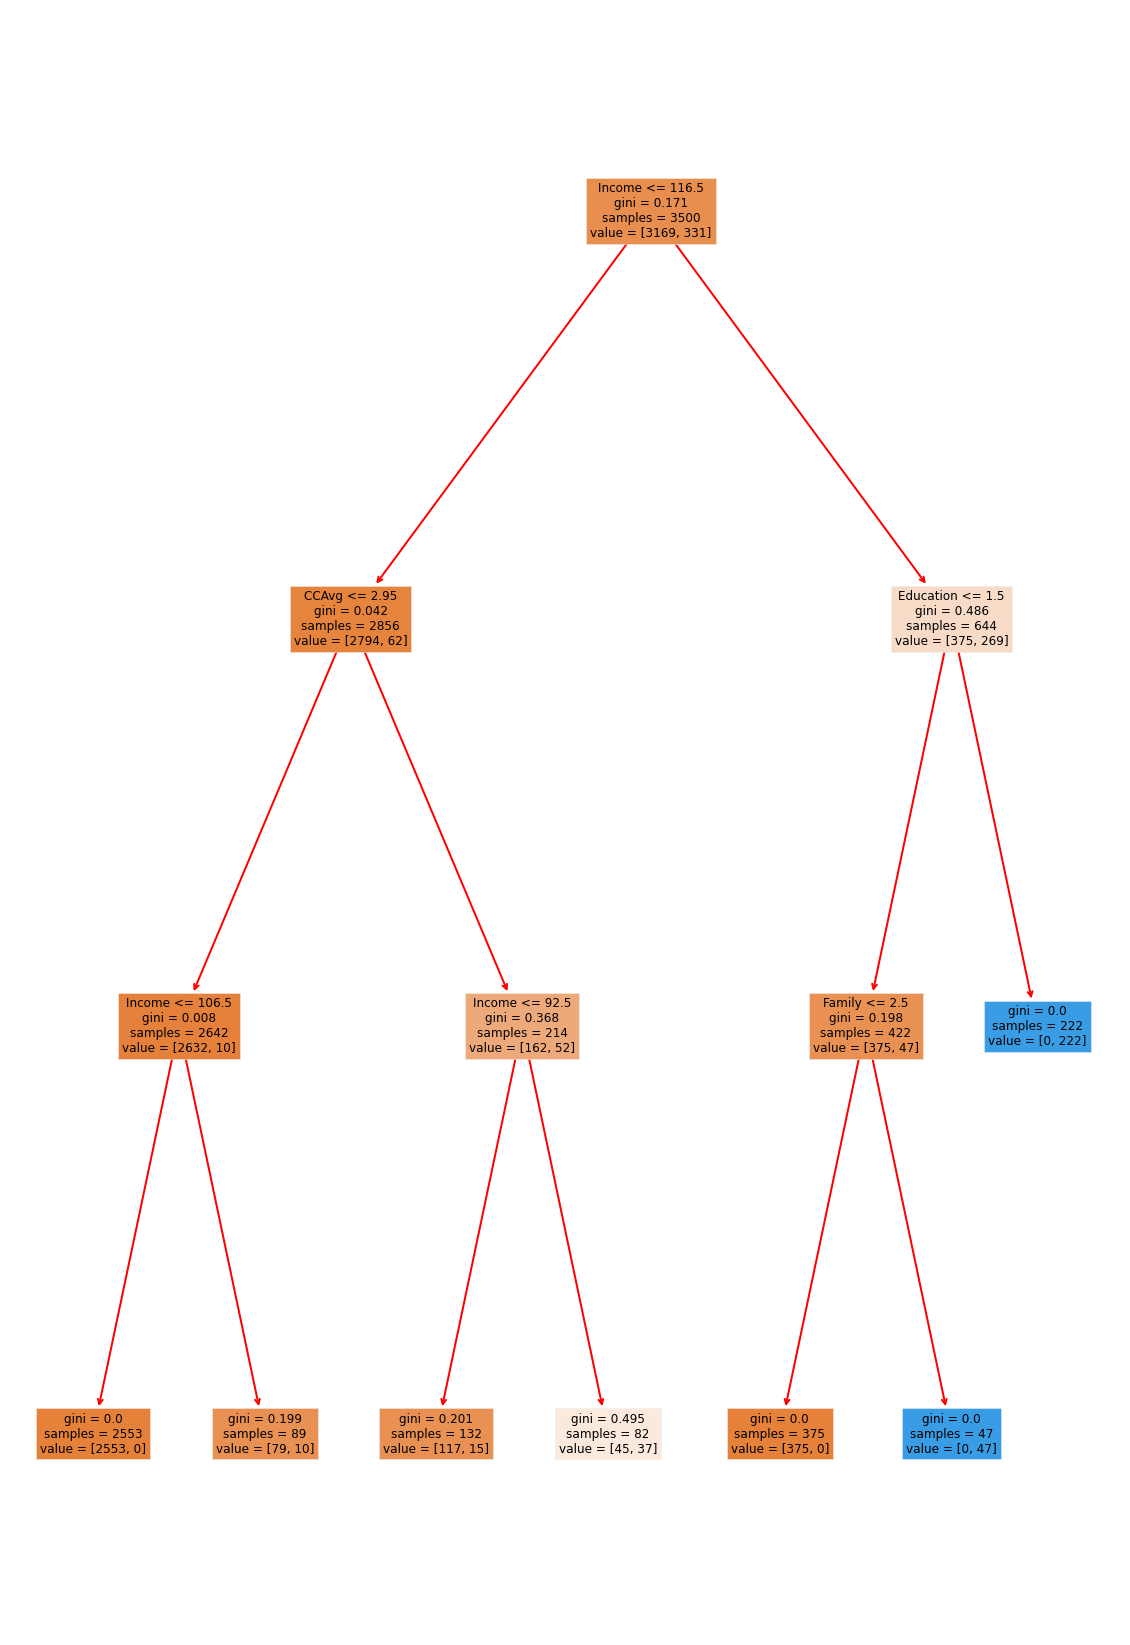

In [51]:
plt.figure(figsize=(20,30))
out = tree.plot_tree(dTree1,feature_names=train_col,filled=True,fontsize=12)

#Adding arrows
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(2)
plt.show()

In [52]:
print(tree.export_text(dTree1,feature_names=train_col));

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- class: 0
|   |   |--- Income >  106.50
|   |   |   |--- class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- class: 0
|   |   |--- Income >  92.50
|   |   |   |--- class: 0
|--- Income >  116.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- class: 0
|   |   |--- Family >  2.50
|   |   |   |--- class: 1
|   |--- Education >  1.50
|   |   |--- class: 1



# <font color=white><span style="background-color:#b22234"> Targeting </span><span style="background-color:#3c3b6e"> Questions </span></font>

### This tree is small enough and can be explained with 3 statements for any given pathway:

- <font color='green'>__Question 1:__</font> Annual income less than (or equal to) 116,500 USD?
    - <font color='blue'>__If Yes, Q2:__</font> Monthly credit card spending less than (or equal to) 2,950 USD?
        - <font color='red'>__If Yes, Q3:__</font> Annual income less than (or equal to) 106,500 USD?
        - <font color='red'>__If No, Q3:__</font> Annual income less than (or equal to) 92,500 USD?
    - <font color='blue'>__If No, Q2:__</font> Education less than (or equal to) Undergraduate level?
        - <font color='red'>__If Yes, Q3:__</font> Family size less (or equal to) 2.5 members?

# <font color=white><span style="background-color:#b22234"> Incorrect </span><span style="background-color:#3c3b6e"> Predictions </span></font>

In [53]:
Predicted_df=df_backup

In [54]:
Predicted_df['Predicted']=dTree1.predict(df.drop('Personal_Loan', axis=1))

In [55]:
Predicted_df['Wrong_Prediction']=Predicted_df['Personal_Loan']-Predicted_df['Predicted']

In [56]:
Predicted_df.Wrong_Prediction.value_counts()

0    4901
1      99
Name: Wrong_Prediction, dtype: int64

In [57]:
df_wrong=Predicted_df[Predicted_df.Wrong_Prediction==1]

In [58]:
df_wrong.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 261 to 4941
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  99 non-null     int64  
 1   Age                 99 non-null     int64  
 2   Experience          99 non-null     int64  
 3   Income              99 non-null     int64  
 4   ZIPCode             99 non-null     int64  
 5   Family              99 non-null     int64  
 6   CCAvg               99 non-null     float64
 7   Education           99 non-null     int64  
 8   Mortgage            99 non-null     int64  
 9   Personal_Loan       99 non-null     int64  
 10  Securities_Account  99 non-null     int64  
 11  CD_Account          99 non-null     int64  
 12  Online              99 non-null     int64  
 13  CreditCard          99 non-null     int64  
 14  Predicted           99 non-null     int64  
 15  Wrong_Prediction    99 non-null     int64  
dtypes: flo

In [59]:
df_wrong.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Predicted,Wrong_Prediction
261,262,42,16,111,93106,2,1.2,3,251,1,0,0,1,0,0,1
321,322,44,20,101,92717,3,4.4,2,82,1,0,0,0,0,0,1
322,323,63,39,101,92007,1,3.9,1,0,1,1,1,1,0,0,1
323,324,59,34,99,90034,1,4.4,1,0,1,0,0,0,0,0,1
349,350,26,2,60,93407,2,3.0,1,132,1,0,0,0,0,0,1


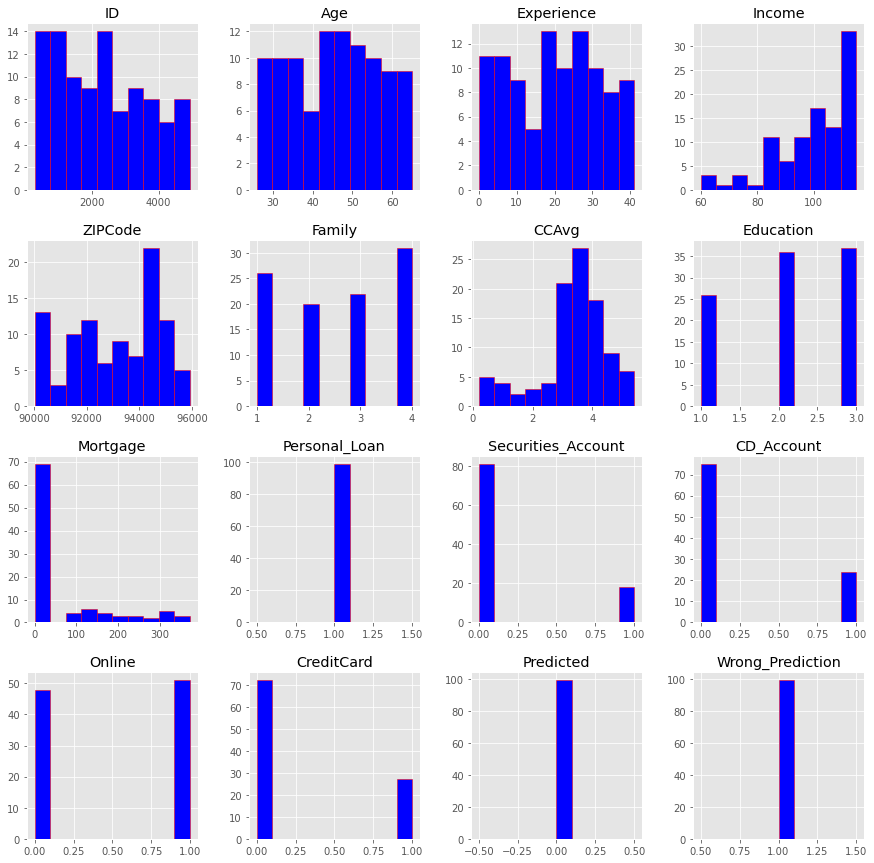

In [60]:
df_wrong.hist(figsize=(15,15), facecolor='blue', edgecolor='red');

In [61]:
df_backup.describe() #mean and other statistics of original dataset

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Predicted,Wrong_Prediction
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000,0.076200,0.019800
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637,0.265344,0.139326
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


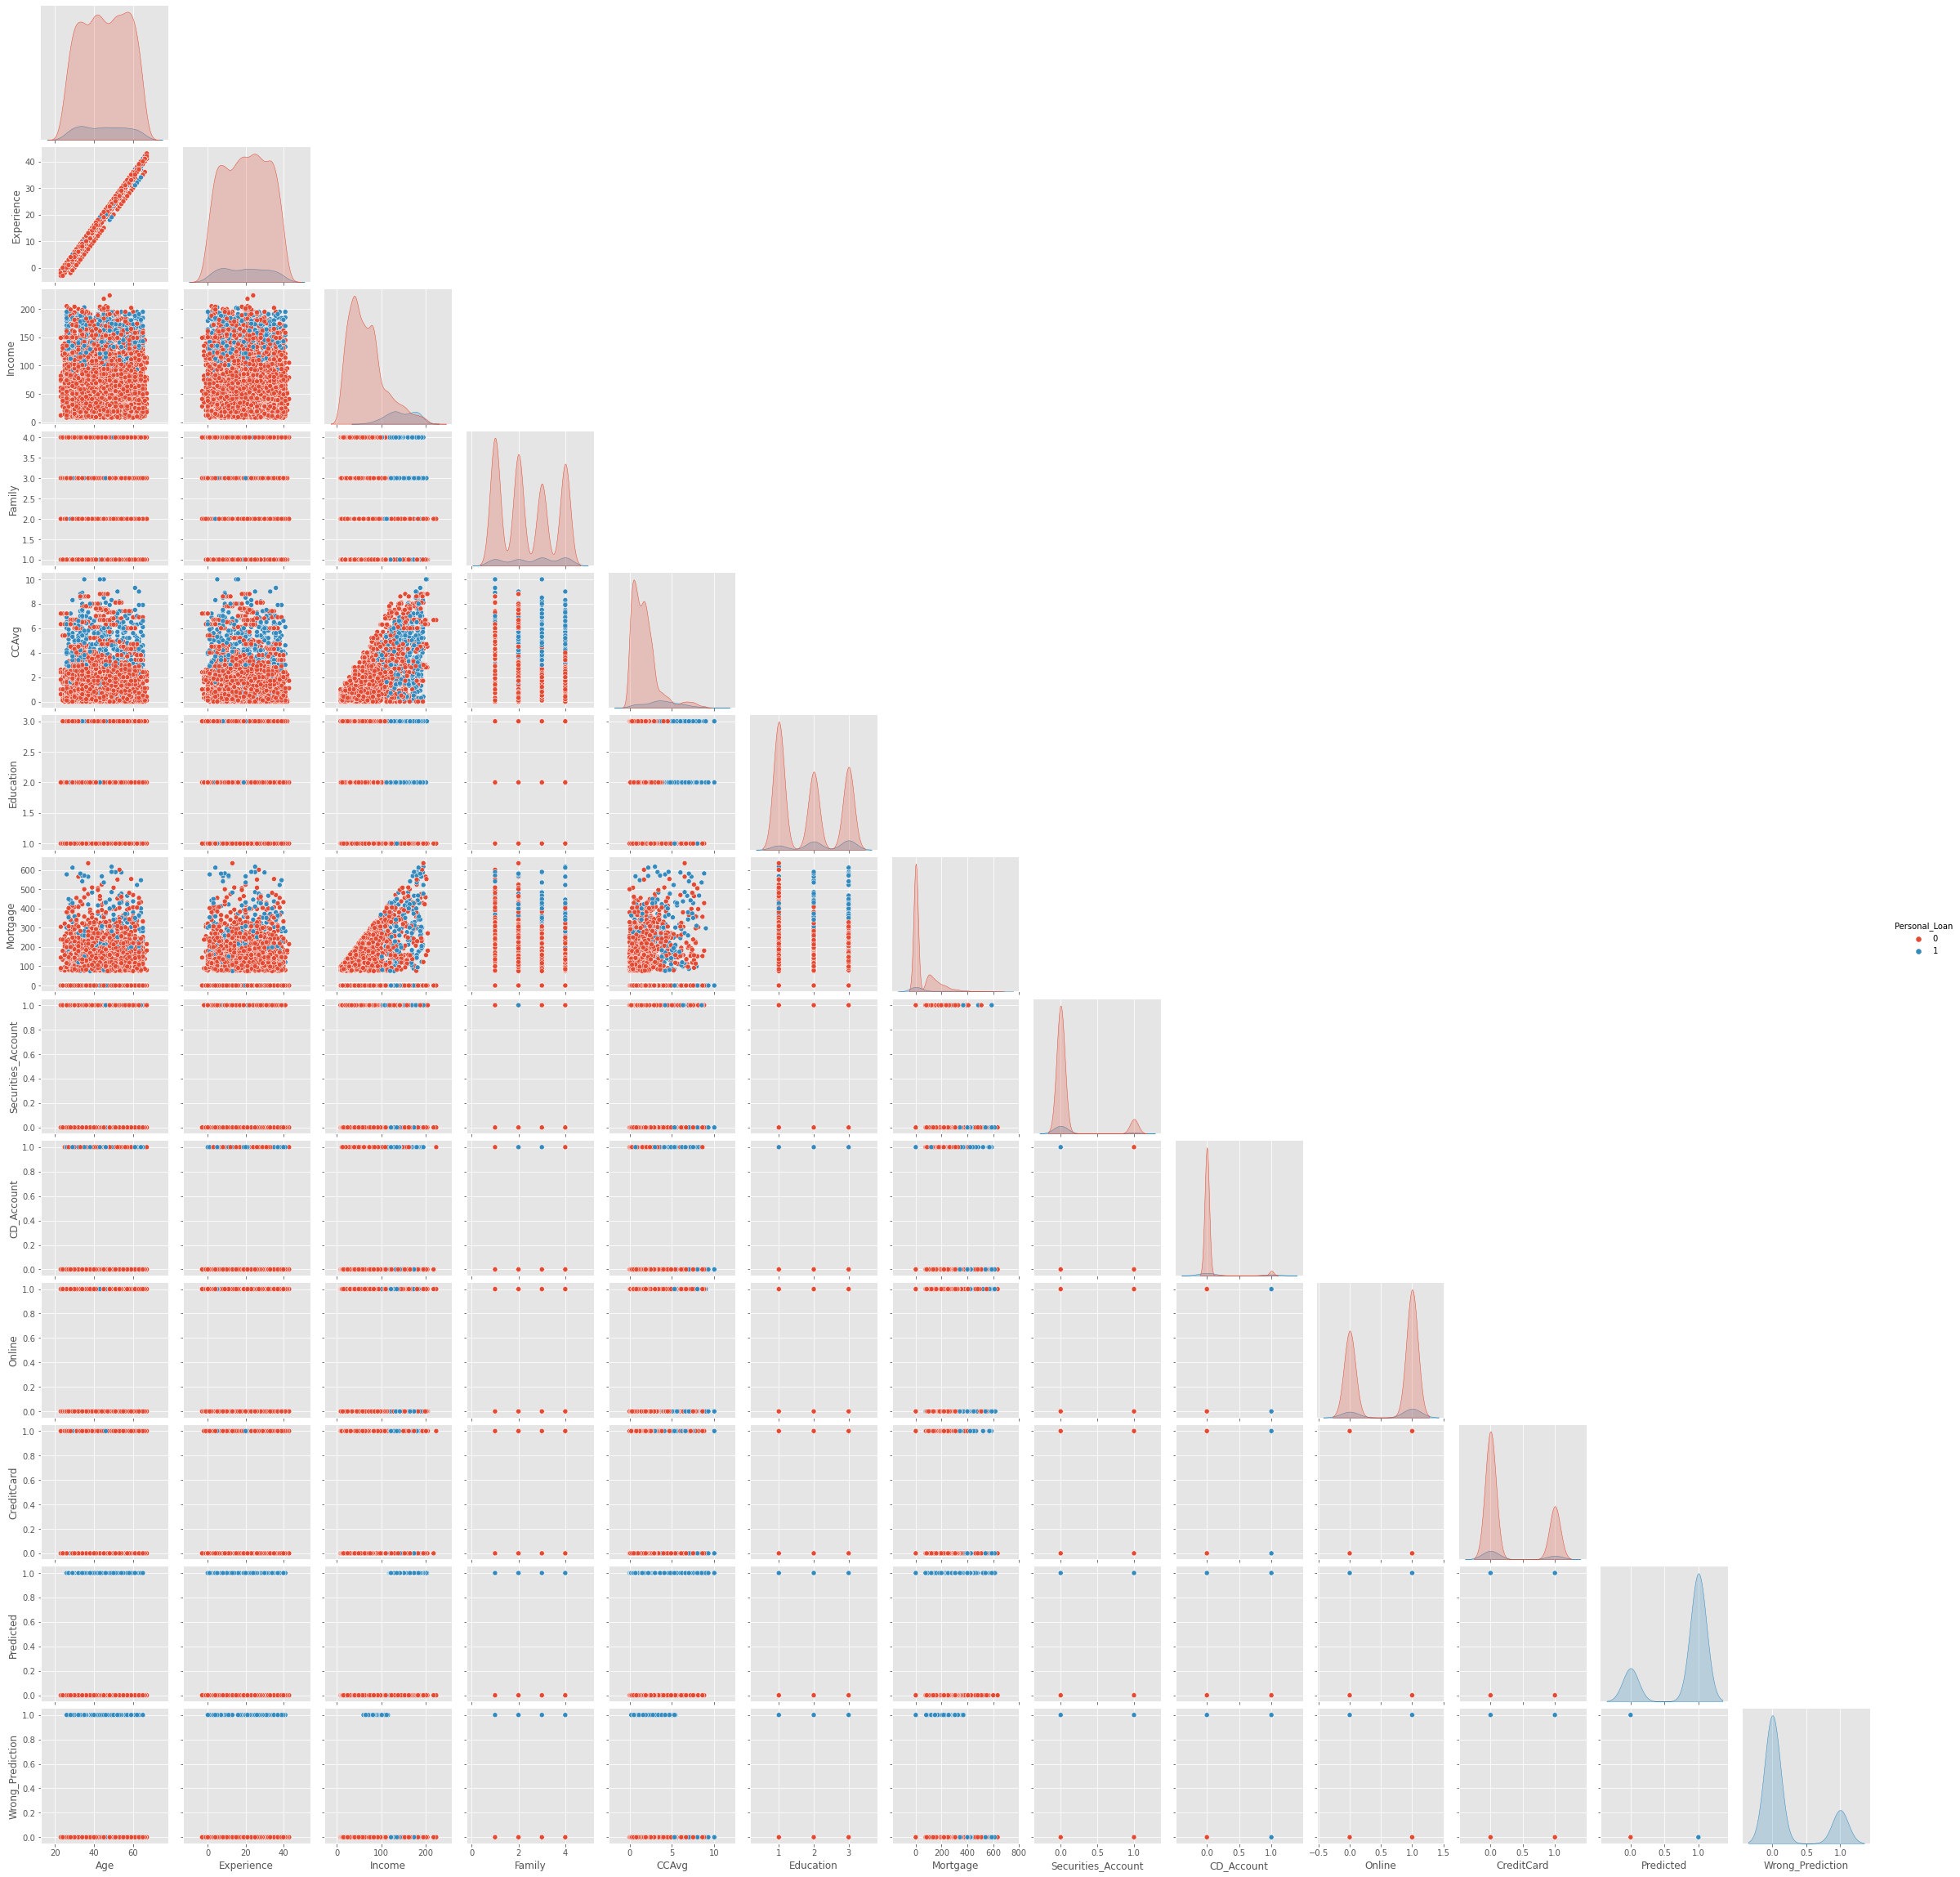

In [65]:
sns.pairplot(data=df_backup.drop(['ZIPCode','ID'],axis=1), hue='Personal_Loan', corner=True)

In [62]:
df_wrong.describe() #mean and other statistics of wrongly predicted dataset

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Predicted,Wrong_Prediction
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.0,99.000000,99.000000,99.000000,99.000000,99.0,99.0
mean,2327.979798,45.363636,20.242424,99.868687,93098.818182,2.585859,3.357071,2.111111,64.040404,1.0,0.181818,0.242424,0.515152,0.272727,0.0,1.0
std,1349.568601,11.352833,11.457188,13.508611,1726.052133,1.186747,1.135143,0.793968,110.192218,0.0,0.387657,0.430730,0.502314,0.447628,0.0,0.0
min,262.000000,26.000000,0.000000,60.000000,90034.000000,1.000000,0.200000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0
25%,1166.000000,35.000000,9.500000,92.500000,91738.000000,1.000000,3.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0
50%,2160.000000,46.000000,21.000000,103.000000,93106.000000,3.000000,3.500000,2.000000,0.000000,1.0,0.000000,0.000000,1.000000,0.000000,0.0,1.0
75%,3338.000000,54.000000,29.000000,111.000000,94593.000000,4.000000,4.000000,3.000000,117.000000,1.0,0.000000,0.000000,1.000000,1.000000,0.0,1.0
max,4942.000000,65.000000,41.000000,115.000000,95929.000000,4.000000,5.400000,3.000000,372.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.0,1.0


# <font color=white><span style="background-color:#b22234"> Final </span><span style="background-color:#3c3b6e"> Recommendations </span></font>

Target the following __two types__ of customers for a succesfull marketing campaign:

- __Type 1:__  Customers who have an annual income higher than 116.5k USD and educated at a level higher than undergraduate
- __Type 2:__ Among whose annual income higher than 116.5k USD but are educated at a level of undergraduate or less - target those who have atleast 3 or more members in their family